# Jakarta Post Online - Media Analysis

In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import re

In [2]:
train = pd.read_csv('jakartapost.csv', encoding= 'utf8', sep=',')

In [3]:
train


,url,Title,Title_link,Desc
0,https://www.thejakartapost.com/tag/infrastructure,"No haj funds invested in infrastructure, offic...",https://www.thejakartapost.com/news/2019/01/24...,Haj Fund Management Agency (BPKH) head Anggito...
1,https://www.thejakartapost.com/tag/infrastructure,"Angkasa Pura II wants to go global, eyes ASEAN...",https://www.thejakartapost.com/news/2019/01/21...,State-owned airport operator Angkasa Pura (AP)...
2,https://www.thejakartapost.com/tag/infrastructure,Trans-Java toll road to open at midnight but d...,https://www.thejakartapost.com/news/2019/01/20...,The toll for the road between Jakarta and Sura...
3,https://www.thejakartapost.com/tag/infrastructure,Tunnel through an Australian mountain? No prob...,https://www.thejakartapost.com/news/2019/01/17...,Australia could become a test ground for anoth...
4,https://www.thejakartapost.com/tag/infrastructure,Game over for Jokowi's 7 percent growth target?,https://www.thejakartapost.com/academia/2019/0...,"Crucially, the foundation to support high grow..."
5,https://www.thejakartapost.com/tag/infrastructure,World Bank clarifies report on Indonesian infr...,https://www.thejakartapost.com/news/2019/01/03...,Following the current public discussion of one...
6,https://www.thejakartapost.com/tag/infrastructure,Outlook: Happy news for some sectors in 2019,https://www.thejakartapost.com/news/2019/01/01...,"The Jakarta Post takes a look at investment, i..."
7,https://www.thejakartapost.com/tag/infrastructure,Not all bad in 2018: Indonesian economic review,https://www.thejakartapost.com/news/2018/12/26...,Natural and man-made disasters overshadowed gr...
8,https://www.thejakartapost.com/tag/infrastructure,Open education can address Indonesia's educati...,https://www.thejakartapost.com/academia/2018/1...,In Indonesia open education is in initial stag...
9,https://www.thejakartapost.com/tag/infrastructure,Government to shift focus from infrastructure ...,https://www.thejakartapost.com/news/2018/12/12...,Education will become another focus of the gov...


In [4]:
train = train[['Title', 'Desc']]

In [5]:
train

,Title,Desc
0,"No haj funds invested in infrastructure, offic...",Haj Fund Management Agency (BPKH) head Anggito...
1,"Angkasa Pura II wants to go global, eyes ASEAN...",State-owned airport operator Angkasa Pura (AP)...
2,Trans-Java toll road to open at midnight but d...,The toll for the road between Jakarta and Sura...
3,Tunnel through an Australian mountain? No prob...,Australia could become a test ground for anoth...
4,Game over for Jokowi's 7 percent growth target?,"Crucially, the foundation to support high grow..."
5,World Bank clarifies report on Indonesian infr...,Following the current public discussion of one...
6,Outlook: Happy news for some sectors in 2019,"The Jakarta Post takes a look at investment, i..."
7,Not all bad in 2018: Indonesian economic review,Natural and man-made disasters overshadowed gr...
8,Open education can address Indonesia's educati...,In Indonesia open education is in initial stag...
9,Government to shift focus from infrastructure ...,Education will become another focus of the gov...


In [6]:
print train.dtypes

Title    object
Desc     object
dtype: object


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Title    200 non-null object
Desc     200 non-null object
dtypes: object(2)
memory usage: 3.2+ KB


In [8]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [11]:
#traintxt = train.to_csv(sep=" ", index=False, header=False)


In [12]:
#train_list = traintxt.split('\n')

In [13]:
train.insert(0, "media", "JakartaPost")

In [14]:
train

,media,Title,Desc
0,JakartaPost,"No haj funds invested in infrastructure, offic...",Haj Fund Management Agency (BPKH) head Anggito...
1,JakartaPost,"Angkasa Pura II wants to go global, eyes ASEAN...",State-owned airport operator Angkasa Pura (AP)...
2,JakartaPost,Trans-Java toll road to open at midnight but d...,The toll for the road between Jakarta and Sura...
3,JakartaPost,Tunnel through an Australian mountain? No prob...,Australia could become a test ground for anoth...
4,JakartaPost,Game over for Jokowi's 7 percent growth target?,"Crucially, the foundation to support high grow..."
5,JakartaPost,World Bank clarifies report on Indonesian infr...,Following the current public discussion of one...
6,JakartaPost,Outlook: Happy news for some sectors in 2019,"The Jakarta Post takes a look at investment, i..."
7,JakartaPost,Not all bad in 2018: Indonesian economic review,Natural and man-made disasters overshadowed gr...
8,JakartaPost,Open education can address Indonesia's educati...,In Indonesia open education is in initial stag...
9,JakartaPost,Government to shift focus from infrastructure ...,Education will become another focus of the gov...


In [9]:
train2 = train

In [10]:
train1 = train

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

In [12]:
from textblob import TextBlob

In [13]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS


In [14]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

In [15]:
tags_lower = train2['Title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

In [16]:
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)


In [17]:
word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

In [18]:
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

In [19]:
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]    

In [20]:
top_N = 10000

In [21]:
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

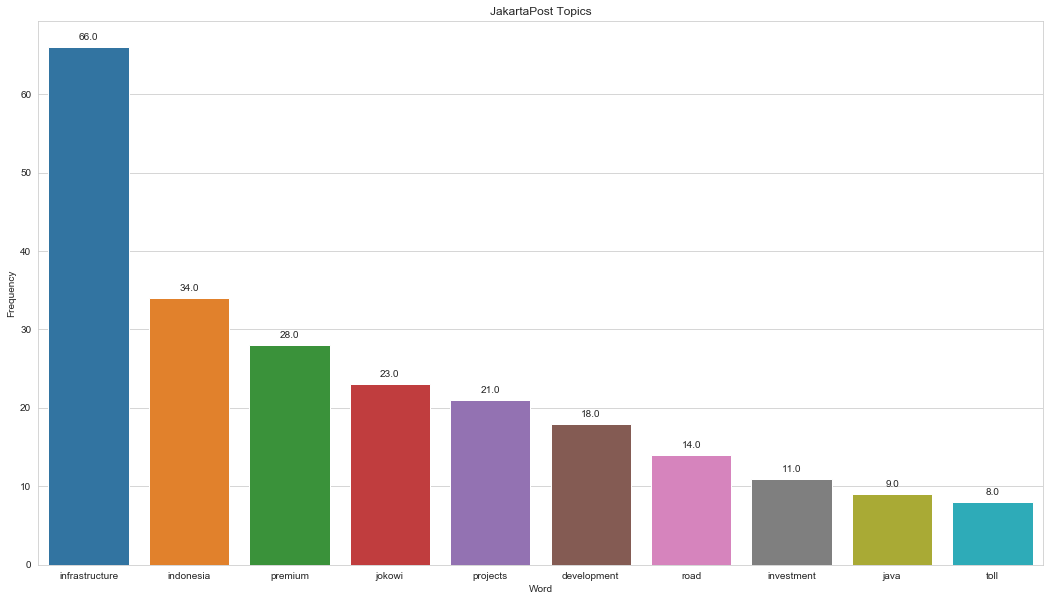

In [22]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
plt.title('JakartaPost Topics')
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(10))


rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)

In [29]:
train2 = train2[['Title']]

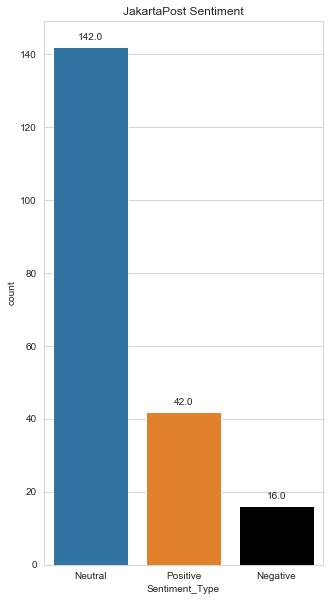

In [23]:
bloblist_desc = list()

train2_descr_str=train2['Title'].astype(str)
for row in train2_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    train2_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(train2_polarity_desc):
    if train2_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif train2_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train2_polarity_desc['Sentiment_Type'] = train2_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("whitegrid")
plt.title('JakartaPost Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train2_polarity_desc, palette=["C0", "C1", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)



In [24]:
train2_polarity_desc

,sentence,sentiment,polarity,Sentiment_Type
0,"No haj funds invested in infrastructure, offic...",0.000000,0.000000,Neutral
1,"Angkasa Pura II wants to go global, eyes ASEAN...",0.100000,0.050000,Positive
2,Trans-Java toll road to open at midnight but d...,0.000000,0.500000,Neutral
3,Tunnel through an Australian mountain? No prob...,0.000000,0.000000,Neutral
4,Game over for Jokowi's 7 percent growth target?,-0.400000,0.400000,Negative
5,World Bank clarifies report on Indonesian infr...,0.000000,0.000000,Neutral
6,Outlook: Happy news for some sectors in 2019,0.800000,1.000000,Positive
7,Not all bad in 2018: Indonesian economic review,-0.250000,0.433333,Negative
8,Open education can address Indonesia's educati...,0.125000,0.375000,Positive
9,Government to shift focus from infrastructure ...,0.000000,0.000000,Neutral
